<a href="https://colab.research.google.com/github/luisana-RS/Math152/blob/main/Exploration_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

We use a simple random walk guided by a weighted four-sided dice roll to simulate a choice of topic for our group project, with the intention of using the statistical data we collect to help inform our decision.

# Introduction




Here's the set-up. We have three options for the topic of our group project: Newton's Method, Seeing the Primes, and a Random Walk. In order to use a random walk as a method of determining which topic to choose, let's introduce a fourth option - we don't turn anything in but somehow convince the grader to still give us a perfect score. Now that we've got four options to choose from, we can assign exactly one option to each of the four quadrants that make up the xy-plane. For example, say we assign Newton's Method to the first quadrant, Seeing the Primes to the second quadrant, a Random Walk to the third, and not turning anything in to the fourth quadrant.  
We start off from the origin, and at each time interval, t, we roll a four sided die whose faces read "Up", "Down", "Left", and "Right". The face that the die lands on will serve as a directional cue for us on our walk with respect to the grid. Repeating this process will lead us on a random walk and eventually land us in one of four quadrants (or stuck in bewtween!). The option corresponding to this quadrant will be recorded, and running this experiment a number of times will give us statistical information on which option is most likely to be chosen by our group.

Now, of course we don't all want to receive a zero on this project (by choosing not to turn anything in) and risk failing the course, so we'll have to introduce a bit of bias into the system.

# Methods

## Random walk


We wrote a program to represent a random walk via MatPlotLib. We decided to take 5000 steps for the random walk to both test numpy's speed and ensure that the random walk is indeed random. If we had done fewer steps it would have been the same as rolling a four-sided die once and letting that single roll decide the outcome; having more steps represents the random walk premise better. The reason we did not do more steps is because we found the plot to be easier to understand with 5000. 
The following code introduces a four-sided die (imagine a pyramid) with faces reading "Up", "Down", "Left", "Right". These directions represent where the walk will go from the previous step with respect to the graph. After 5000 steps, the walk will end up in one of the four quadrants which are associated with different choices for our group project, as aforementioned. If the walk ends up on an x-axis boundary we decided to have the walk take one extra step upwards to weight the walk against the fourth quadrant (not turning anything thus risk getting a bad grade). If the walk ends up on a y-axis boundary we decided to have the walk take one extra step to the left for similar reasons. If the walk ends up at the origin where we started, by way of how we have ordered the code, the walk will take one step up then one step to the left. 


In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

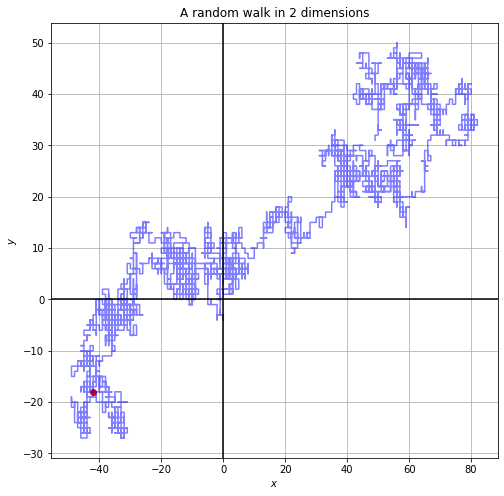

In [5]:
# random walk guided by fair four-sided die.

xlist = np.zeros(5000)
ylist = np.zeros(5000)
x,y=0,0
dice_faces = ["Up", "Down", "Left", "Right"]
for t in range(5000):
  dice_roll = random.choice(dice_faces)
  if dice_roll == "Up":
    xlist[t] = xlist[t-1]
    ylist[t] = ylist[t-1]+1
  elif dice_roll == "Down":
    xlist[t] = xlist[t-1]
    ylist[t] = ylist[t-1]-1
  elif dice_roll == "Right":
    xlist[t] = xlist[t-1]+1
    ylist[t] = ylist[t-1]
  else:
    xlist[t] = xlist[t-1]-1
    ylist[t] = ylist[t-1]

#if walk ends up on x-axis boundary (y = 0) have walk take an extra step "Up"
#if xlist[t] == 0

#if walk ends up on y-axis boundary (x = 0) have walk take an extra step "Left"

plt.figure(figsize=(8,8))
plt.plot(xlist, ylist, alpha=0.5, c='blue') 
plt.grid() 
plt.xlabel('$x$') 
plt.ylabel('$y$')
plt.title('A random walk in 2 dimensions')
plt.scatter(xlist[999], ylist[999],c='red') # Shows the endpoint of the walk as red dot.
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")
plt.show()

## Weighted random walk


We repeated the MatPlotLib representation of our random walk but this time weighted the four-sided die. To stray away from the walk ending up in the fourth quadrant, we decided to weigh the die so that every fiftieth roll there is no option for the walk to head "Down". 

In [2]:
# random walk guided by WEIGHTED four-sided die.
# Forces user to roll a three-sided die (missing "Down") every fiftieth roll
# Hopefully encourages that the walker does not end in the fourth quadrant....
def random_walk(x):
  xlist = np.zeros(x)
  ylist = np.zeros(x)
  die_faces = ["Up", "Down", "Left", "Right"]
  less_die_faces =["Up","Left", "Right"]
  for t in range(1, x):
    if t%50==0:
      dice_roll = random.choice(less_die_faces)
      if dice_roll == "Up":
        xlist[t] = xlist[t-1]
        ylist[t] = ylist[t-1]+10
      elif dice_roll == "Right":
        xlist[t] = xlist[t-1]+10
        ylist[t] = ylist[t-1]
      else:
        xlist[t] = xlist[t-1]-10
        ylist[t] = ylist[t-1]
    else:
      dice_roll = random.choice(die_faces)
      if dice_roll == "Up":
        xlist[t] = xlist[t-1]
        ylist[t] = ylist[t-1]+10
      elif dice_roll == "Down":
        xlist[t] = xlist[t-1]
        ylist[t] = ylist[t-1]-10
      elif dice_roll == "Right":
        xlist[t] = xlist[t-1]+10
        ylist[t] = ylist[t-1]
      else:
        xlist[t] = xlist[t-1]-10
        ylist[t] = ylist[t-1]

  #if walk ends up on x-axis boundary (y = 0) have walk take an extra step "Up"
  if ylist[x-1] == 0:
    xlist[t] = xlist[t-1]
    ylist[t] = ylist[t-1]+1
  #if walk ends up on y-axis boundary (x = 0) have walk take an extra step "Left"
  if xlist[x-1] == 0:
    xlist[t] = xlist[t-1]-1
    ylist[t] = ylist[t-1]
  
  
  return np.array([xlist[x-1], ylist[x-1]])



  

We define a function to collect data on the endpoints of N many random walks.

In [6]:
''' 
This function runs random walk function N times and creates
an Nx2 array whose values are the endpoints of each of the random walks.
'''
def random_walk_endpoints(N):
  endpoints, i = np.zeros((N, 2)), 0
  while i <= N-1:
    endpoints[i,:] = random_walk(N)
    i+=1
  return endpoints


endptsarray = random_walk_endpoints(2000)

In [7]:
import seaborn as sns

## Pil Imaging

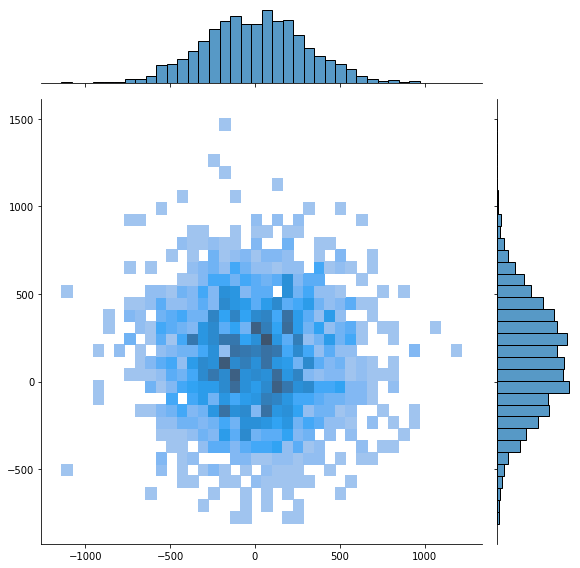

In [14]:
#plt.figure(figsize=(8,8))
#plt.scatter(endptsarray[:, 0], endptsarray[:, 1],c='red')

sns.jointplot(data=endptsarray, x=endptsarray[:, 0], y=endptsarray[:, 1], kind = "hist", height = 8)


What can we say about the distribution of endpoints across the four quadrants? How can we interpret this data? Do the different colors in the seaborn plot represent endpoint density? What do the bar graphs on the side represent and how do they influence our understanding of the scatterplots?

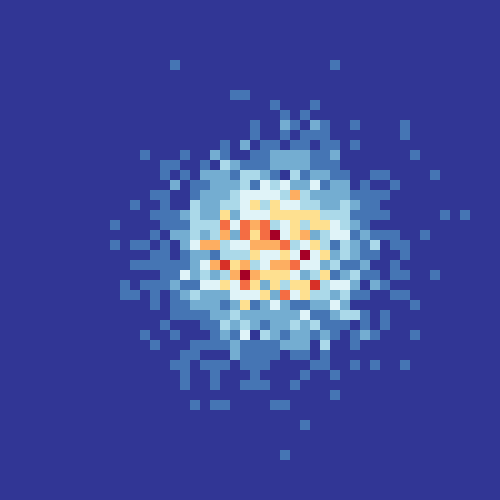

In [9]:
from PIL import Image

#Finding the furthest the random walk gets from the origin
square_min = np.amin(endptsarray)
square_max = np.amax(endptsarray)

#Taking the maximum of the largest array value and the absolute value of the smallest
#This will tell us the size of the smallest square centered at the origin that will include all the endpoints
max_abs = max([abs(square_min),abs(square_max)])

#Number of endpoints
pts = np.shape(endptsarray)[0]

#Number of bins to divide the image up into
bins = 50
bin_array = np.zeros((bins,bins))

#Function that takes bin size and coordinates of bottom left corner and outputs number of endpoints in that bin
def bin_count(size,x1,y1):
  n = 0
  for i in range(pts):
    if endptsarray[i,0] >= x1 and endptsarray[i,0] < (x1 + size) and endptsarray[i,1] >= y1 and endptsarray[i,1] < (y1 + size):
      n += 1
  return n

#The size of the bins, based on the number of bins and the range of endpoints
bin_size = 2 * max_abs / bins

#Looping over all bins in the square and using the bin_count() function to figure out the number of endpoints in that bin
for x in range(bins):
  for y in range(bins):
    bin_array[x,y] = bin_count(bin_size, -max_abs + bin_size*x, -max_abs + bin_size*y)

#Finding the bin with the most endpoints in it
big_bin = np.amax(bin_array)

#Scaling the bin_array
#Creates an array of integers between 0 and 9 that can then be assigned one of 10 colors from a heat scale
scaled_array = 9 * (1 - bin_array / big_bin)
scaled_array = scaled_array.astype(int)

#The heat scale
#heat_scale[0] is hot red while heat_scale[9] is cool blue
heat_scale = np.array([[165,0,38],[215,48,39],[244,109,67],[253,174,97],
              [254,224,144],[224,243,248],[171,217,233],[116,173,209],
              [69,117,180],[49,54,149]])

#Creating the image array
size = 500
array = np.zeros((size, size, 3), dtype=np.uint8)

#Looping over each square in the output image and assigning every pixel a color based on the corresponding bin
#Pixels are assigned one of the 10 heat scale colors
scale = size // bins
for i in range(bins):
  for j in range(bins):
    for x in range(i*scale,(i+1)*scale):
      for y in range(j*scale,(j+1)*scale):
        array[x,y] = heat_scale[scaled_array[i,j]]

#Using PIL to display the image
img = Image.fromarray(array)
display(img)

# Results

In order to analyze the results of our group's Exploration 2 project, we will break it into two parts; the unweighted and weighted random walks. First, we constructed a two dimensional random walk, with each of the four quadrants representing a unique project topic. The first three quadrants represent the three topics for Exploration 2, while the fourth quadrant represents our group's decision to not turn in a project. 
 
The unweighted function that our group wrote first had an unbiased chance to walk in all four cardinal directions, with 5000 total steps each with a length of one. This function allowed us to create a random assortment of endpoints, which, unbiased, would end up in a completely random quadrant. However, we wanted a way to bias or push the random walk away from the fourth quadrant, as this would represent our group turning in no work, an undesirable result to say the least.
 
A weighted function was the logical next step to steer the random walk away from the fourth quadrant. We accomplished this using two different techniques. The first was introducing a new set of directions on every 50th roll that did not include the direction 'down'. As we will see from the images that were created this did in fact help to bias the random walk to the first, second and third quadrants. However, this was only on every 50th roll, so if we take a total of 5000 steps, that is only 100 times that this bias was introduced or only 2% of the steps. The second way we introduced bias away from the fourth quadrant is through shifting endpoints off of the x and y axis. Before in the unweighted model, any endpoint that fell on either of the axes was treated as an 'indecision' for which project to undertake. Within the weighted model, all endpoints on the x-axis were shifted in the positive y direction, while all endpoints that fell on the y-axis were shifted in the negative x direction. This was introduced to hopefully move some of the endpoints to the three quadrants that corresponded to the three project options. Any endpoints that happened to land back at the origin would have both shifts occur, and would always shift to the second quadrant.  
 
The MatPlotLib image was generated using the seaborn graphing package and contains the same insights into the weighted walk as the scatterplot, but albeit much more aesthetic. It is also much easier to see the bais to the upper left side of the graph, where the darker the shade of blue represents a denser distribution of endpoints within the hexagon. Now, unlike in the scatterplot, the lack of endpoints on the x and y axis can be much more easily observed. If one looks at the distribution on the right hand side of the seaborn graph, the bin containing the y values of the endpoints is reduced in comparison to the bin directly greater than it. While the bin directly less than it has even less endpoints. We would expect the distribution to be normal in the unweighted random walk, and within the seaborn graph the lack of normality about the y values is proof that our biasing worked to move the endpoints, on average, away from the fourth quadrant. The exact same lack of normality is also present when looking at the top distribution that relates to the x values. All of this is to say the endpoints, within both the weighted and unweighted random walks, had a normal distribution of endpoints in general. However, once bias was introduced in the weighted walk, endpoints that fell in the bin that also included the y and x axis were much reduced and we were left with a distribution heavily skewed away from the fourth quadrant, and the bins of the x and y axis. These two images were very useful for the analysis of our functions, but we needed a PIL image that could give more in depth information on the distribution of endpoints for the weighted model.
 
For our group's PIL image we chose to graph the distribution of the weighted random walk endpoints using a blue to red scale. Much of the same results are shown in this PIL image as in the seaborn image, but with distinction between the high and low density areas. We can clearly see the distinction between the fourth quadrant and all the other quadrants, represented by the white pixels in the center of the image. This is the line of demarcation between the endpoints falling on the x and y axis and those above and below. We can also more clearly see how the fourth quadrant has a slight bias away from it, shown through the higher density of endpoints ‘northwest’ of the origin. We can also see how scarce endpoints are from the center of the picture. There is a clear ring in which the vast majority of the endpoints are contained. Outliers are still present and are represented by the slightly lighter blue, showing how low the density of these endpoints are. It must still be emphasized that even with the biasing that we introduced, there is still a high amount of randomness in the model. This will change results, however the general biased trend will still remain. 


# Conclusion

Our group successfully constructed several functions that attempted to answer our first question as a group; which of the three projects should we choose or if we should even choose a project at all. Unfortunately, we seemed to have constructed a model random enough that our question was still unanswered. We first created an unweighted random walk which would take 5000 steps, where each step was a random cardinal direction about the x,y plane. This function seemed to, about a fourth of the time, result in us choosing to not turn in a project. A result of not turning in work was deemed not acceptable, so we introduced bias into the model. The inclusion of bias away from this fourth option allowed for more direction in which topic to choose, however we still had far from a concrete answer. We then used a scatterplot and seaborn hexagon graph to show the density of these answers, however the results were still far too random. In our desperation, we constructed a PIL image, on a color gradient from blue to red representing low to high density respectively. This provided yet more insight into our decision, but it was at this moment we realized that we did in fact choose a project to complete and our random walk project was finished.